In [1]:
from janome.tokenizer import Tokenizer
from gensim import corpora, models

# テキストデータ
documents = [
    "報告がいつも丁寧で感心しています",
    "報告書が重複しているので不要です",
    "ほかの顧客も困っているのでは？",
    "評価が難しいです"
]

# Janomeの形態素解析器
tokenizer = Tokenizer()

# 文書を形態素に分割し、名詞だけを取り出す
texts = [
    [token.base_form for token in tokenizer.tokenize(document) if token.part_of_speech.split(',')[0] in ['名詞']]
    for document in documents
]

# 辞書の作成
dictionary = corpora.Dictionary(texts)

# コーパスの作成
corpus = [dictionary.doc2bow(text) for text in texts]

# LDAモデルのトレーニング
lda_model = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# トピックの表示
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.208*"報告" + 0.125*"不要" + 0.125*"書" + 0.124*"重複" + 0.124*"丁寧" + 0.124*"感心" + 0.044*"評価" + 0.042*"顧客" + 0.042*"ほか" + 0.042*"の"')
(1, '0.166*"の" + 0.166*"ほか" + 0.166*"顧客" + 0.164*"評価" + 0.057*"感心" + 0.057*"丁寧" + 0.057*"報告" + 0.056*"重複" + 0.056*"書" + 0.056*"不要"')


In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

text = "Python is a great programming language. It is used in data science, web development, automation, and many other fields."

font_path = '/ipaexg.ttf'

try:
    wordcloud = WordCloud(width=800, height=400, font_path=font_path).generate(text)
    # ワードクラウドの表示
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
except Exception as e:
    print("エラーが発生しました:", e)

エラーが発生しました: cannot open resource


In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

topics = [
    (0, '0.208*"報告" + 0.125*"不要" + 0.125*"書" + 0.124*"重複" + 0.124*"丁寧" + 0.124*"感心" + 0.044*"評価" + 0.042*"顧客" + 0.042*"ほか" + 0.042*"の"'),
    (1, '0.166*"の" + 0.166*"ほか" + 0.166*"顧客" + 0.164*"評価" + 0.057*"感心" + 0.057*"丁寧" + 0.057*"報告" + 0.056*"重複" + 0.056*"書" + 0.056*"不要"')
]

def extract_words(topic):
    words = {}
    for item in topic.split('+'):
        weight, word = item.split('*')
        word = re.sub(r'[^\w]', '', word)
        words[word] = float(weight)
    return words

# フォントパスを指定
font_path = "./ipaexg.ttf"

# ワードクラウドの生成と表示
plt.figure(figsize=(16, 8))
for i, (_, topic_content) in enumerate(topics):
    words = extract_words(topic_content)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate_from_frequencies(words)
    plt.subplot(1, 2, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i}')
plt.show()


ValueError: Only supported for TrueType fonts

<Figure size 1152x576 with 0 Axes>

# エラーの対処に困った
- fontは読み込めているようだが、エラーになってしまう。
- 同じコードをgoogle colabで実行したところ、無事に結果を出力できた
  - https://colab.research.google.com/drive/1UrxdoF7qg95m93yL-hAY3vJqCzuaOCxi?usp=sharing
- 環境の問題か？

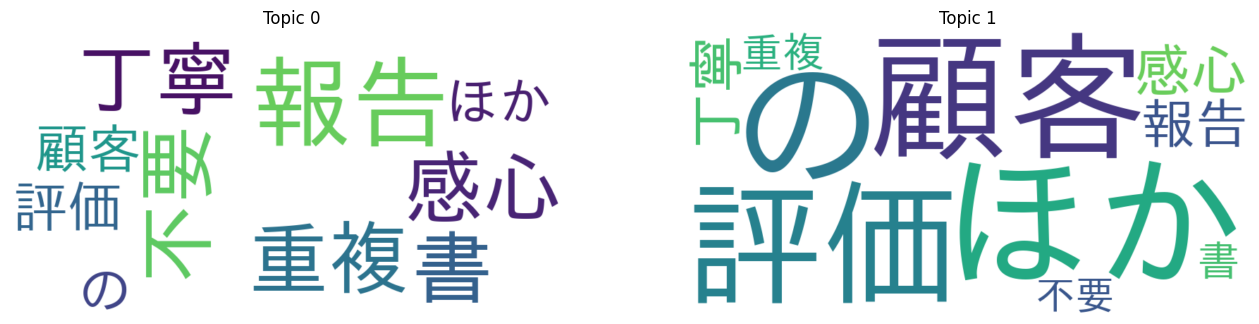